# This notebook creates the energy- angle data to use as an input in the mean function. 



In [1]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [2]:
def dist_th(th_var, th1, th_period):
    ## Account for periodicity
    th_var1 = (th_var%th_period)
    del1_th1 = (np.abs(th_var1 - th1))
    del2_th1 = (np.abs(th1 + th_period - th_var1))
    del_th1 = np.minimum(del1_th1, del2_th1)
    return del_th1

def func_val(del_th, dth1, a1, h1):
    y_val = 0*del_th
    nsz = np.size(del_th)
    for ct1 in range(nsz):
        dth = del_th[ct1]
        if dth == 0:
            y_val[ct1] = a1
        elif (dth <= dth1) and (dth > 0):
            dth_sc = dth/dth1
            y_val[ct1] = ((h1-a1)*(dth_sc)*(1 - np.log(dth_sc)) + a1)
        elif (dth > dth1):
            y_val[ct1] = h1
    return y_val

Read the data for [110] symm tilt gbs data


In [3]:
pkl_name = '../../data/symm_angs_engs.pkl'
jar = open(pkl_name, 'rb')
s2 = pkl.load(jar,encoding='latin1')
jar.close()

angle = s2['angs']                 # in radian
Es = s2['engs']                     # eng is mJ/m^2
cusp_ang = s2['cusps']['angs']      # the angle of cusps in radian 
cusp_Es = s2['cusps']['engs']       # the energy of cusps in radian

In [6]:
cusp_Es

array([  0.        ,  75.19372177, 150.7627575 ])

In [4]:
## Global Mean-Energy parameter
h = 400 ## mJ/m^2
## Randomly initialized to satisy the constraint h1*h2*h3 = h
h1 = h**(1.0/3.0)
h2 = h**(1.0/3.0)
h3 = h**(1.0/3.0)

## Cusp-1
th1 = cusp_ang[0]
E1 = cusp_Es[0] ## mJ/m^2
# Parameters
dth1 = 15*np.pi/180 ## degrees
a1 = 0 ## a1*h2*h3 = E1

## Cusp-2
th2 = cusp_ang[1]
E2 = cusp_Es[1] ## mJ/m^2
# Parameters
dth2 = 10*np.pi/180
a2 = E2/(h1*h3) ## a2*h1*h3 = E2


## Cusp-3
th3 = cusp_ang[2]
E3 = cusp_Es[2]
# Parameters
dth3 = 10*np.pi/180
a3 = E3/(h1*h2) ## a3*h1*h2 = E3

print([a1,h1])
print([a2,h2])
print([a3,h3])

[0, 7.368062997280773]
[1.3850801975344966, 7.368062997280773]
[2.7770737373031964, 7.368062997280773]


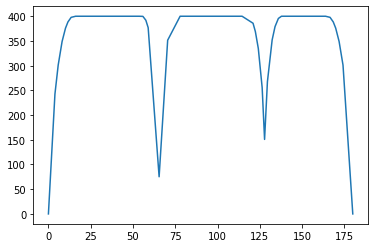

In [5]:

## Plot function w.r.to Cusp-1
th_var = angle
del_th1 = dist_th(th_var, th1, np.pi)
eng_y1 = func_val(del_th1, dth1, a1, h1)



## Plot function w.r.to Cusp-2
th_var = angle
del_th2 = dist_th(th_var, th2, np.pi)
eng_y2 = func_val(del_th2, dth2, a2, h2)


## Plot function w.r.to Cusp-3
th_var = angle
del_th3 = dist_th(th_var, th3, np.pi)
eng_y3 = func_val(del_th3, dth3, a3, h3)


## Product Function
eng_y = eng_y1*eng_y2*eng_y3
# print(eng_y)
plt.plot(th_var*180/np.pi, eng_y)

In [10]:

mean_y = np.mean(eng_y)
std_y = np.std(eng_y)
eng_y = (eng_y - mean_y) / std_y
id_data = np.linspace(0,67,68, dtype=int)
np.savetxt('read_mean.txt', np.c_[angle, eng_y])

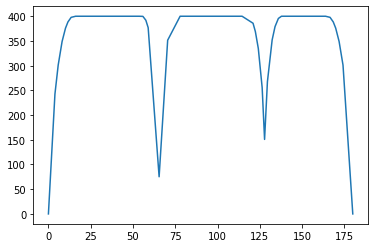

In [7]:
plt.plot(th_var*180/np.pi, eng_y)

In [8]:
pkl_name = '../../data/symm_angs_engs.pkl'
jar = open(pkl_name, 'rb')
s2 = pkl.load(jar,encoding='latin1')
jar.close()

Angle = s2['angs']                 # in radian
Y0 = s2['engs']     
mean_y = np.mean(Y0)
std_y = np.std(Y0)
Y = (Y0 - np.mean(Y0)) / np.std(Y0)
NoiseVar = np.exp(-((Y - 2) ** 2) / 4)/10

Text(0, 0.5, 'Energy')

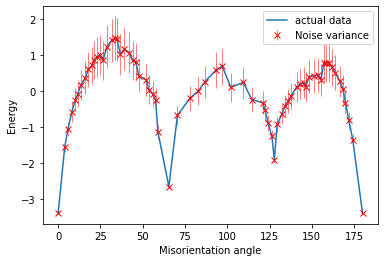

In [9]:
plt.plot(th_var*180/np.pi, Y, label='actual data')
plt.errorbar(
    th_var*180/np.pi,
    Y,
    yerr=2 * (np.sqrt(NoiseVar)).squeeze(),
    marker="x",
    lw=0,
    elinewidth=.5,
    color="r",
    label='Noise variance'
)
plt.legend()
plt.xlabel('Misorientation angle')
plt.ylabel('Energy')

In [11]:
NoiseVar.max()

0.0933491783527273